In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('suicide_rates.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Which country have the most number of suicides?
df_country = pd.pivot_table(df, values='suicides_no',index=['country'])
df_country = df_country.sort_values(by='suicides_no',ascending=False)
df_country.head()

,suicides_no
country,
Russian Federation,3733.771605
United States,2779.604839
Japan,2169.091398
Ukraine,952.232143
Germany,933.532051


In [4]:
# Which year have the most number of suicides?
df_year = pd.pivot_table(df, values='suicides_no',index=['year'])
df_year = df_year.sort_values(by='suicides_no',ascending=False)
df_year.head()

,suicides_no
year,
1994,284.390931
1993,284.057692
2015,273.709677
1992,271.119231
1996,267.018398


In [5]:
df_RS = df[df['country'].str.contains('Russian Federation')]
df_RS.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20936,Russian Federation,1989,male,75+ years,1393,1349100,103.25,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation
20937,Russian Federation,1989,male,35-54 years,12030,18058500,66.62,Russian Federation1989,NaN,"506,500,173,960",3740,Silent
20938,Russian Federation,1989,male,55-74 years,6250,9383700,66.60,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation
20939,Russian Federation,1989,male,25-34 years,6856,12748800,53.78,Russian Federation1989,NaN,"506,500,173,960",3740,Boomers
20940,Russian Federation,1989,female,75+ years,1677,4738100,35.39,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation


In [6]:
df_RS2 = pd.pivot_table(df_RS,values='suicides/100k pop',index=['year'])

In [7]:
df_RS2 = df_RS2.sort_values(by='suicides/100k pop',ascending=False)
df_RS2.head()

,suicides/100k pop
year,
1994,47.303333
1995,45.615000
1996,43.856667
1993,43.505000
1999,42.510833


C:\Users\Witwit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


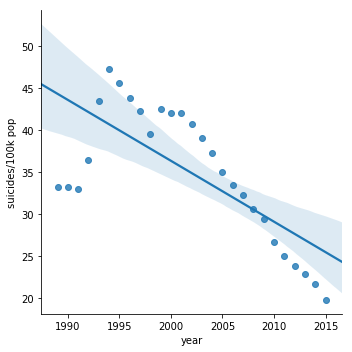

In [8]:
sns.lmplot(x='year',y='suicides/100k pop',data=df_RS2.reset_index())

In [9]:
df_RS3 = pd.pivot_table(df_RS,values='suicides/100k pop',index=['sex'],aggfunc=np.sum)
df_RS3

,suicides/100k pop
sex,
female,1879.37
male,9425.76


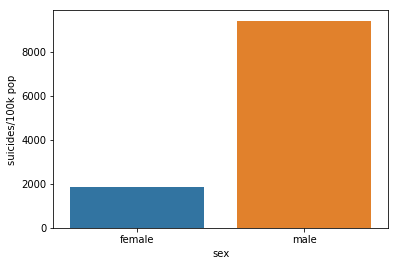

In [10]:
sns.barplot(x='sex',y='suicides/100k pop',data=df_RS3.reset_index())

In [11]:
df_RS.head()
df_RS_gen = pd.pivot_table(data=df_RS,values='suicides/100k pop',index=['generation'])
df_RS_gen = df_RS_gen.reset_index()
df_RS_gen = df_RS_gen.sort_values(by='suicides/100k pop',ascending=False)
df_RS_gen

,generation,suicides/100k pop
1,G.I. Generation,61.156429
5,Silent,48.155270
0,Boomers,43.323000
2,Generation X,32.473056
4,Millenials,14.821389
3,Generation Z,1.371111


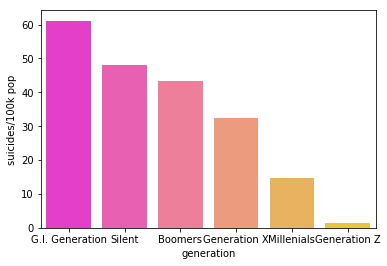

In [12]:
sns.barplot(data=df_RS_gen,x='generation',y='suicides/100k pop',palette='spring')

In [13]:
df2 = df.groupby(['country']).sum()
df2 = df2.sort_values(by='suicides_no',ascending=False)
df2.head()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Russian Federation,648648,1209742,3690802620,11305.13,0.000,2112096
United States,744000,1034013,8054027201,5140.97,106.992,14608296
Japan,744000,806902,3681024844,8025.23,103.356,13539888
France,719820,329127,1670756775,7803.25,101.832,11333328
Ukraine,672192,319950,1286469184,8931.66,68.496,627492


In [14]:
df2.reset_index().head()

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Russian Federation,648648,1209742,3690802620,11305.13,0.000,2112096
1,United States,744000,1034013,8054027201,5140.97,106.992,14608296
2,Japan,744000,806902,3681024844,8025.23,103.356,13539888
3,France,719820,329127,1670756775,7803.25,101.832,11333328
4,Ukraine,672192,319950,1286469184,8931.66,68.496,627492
